# DKRZ tutorial

## About legends in a nutshell

<hr>

2024 copyright DKRZ licensed under CC BY-NC-SA 4.0
               (https://creativecommons.org/licenses/by-nc-sa/4.0/deed.en)
<hr>

After repeated searches for special settings on the subject of legends, this notebook provides a short overview.

+ Default legend
+ Legend location
+ Split legend
+ Label font size
+ Space between line and label
+ Lines and columns
+ Legend box border and fill color
+ Change the legend labels
+ Legend line widths
+ Change marker/hatch boxes border lines
+ Patches and Markers
+ Control the number of markers in legend lines

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html <br>
https://matplotlib.org/stable/users/explain/axes/legend_guide.html <br><br>

In [1]:
import copy
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D

Dummy data

In [2]:
x = np.arange(0, 20, 1)
y = np.arange(0, 20, 1)

### Default legend

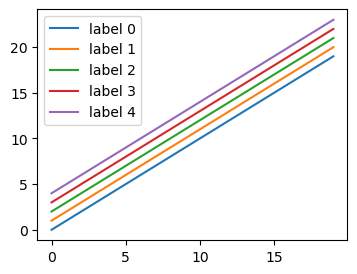

In [3]:
fig, ax = plt.subplots(figsize=(4,3))

for i in range(5):
    ax.plot(x, y+i, label=f'label {i}')

ax.legend();

### Legend location

The legend location can be changed with the `loc` keyword.

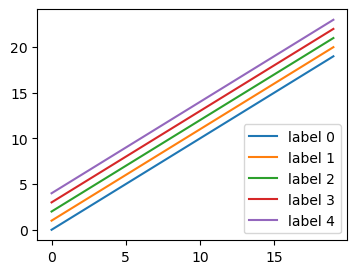

In [4]:
fig, ax = plt.subplots(figsize=(4,3))

for i in range(5):
    ax.plot(x, y+i, label=f'label {i}')

ax.legend(loc='lower right');

Move the legend out of the axis area using the `bbox_to_anchor` keyword.

2-tuple input: (x, y)
4-tuple input: (x, y, width, height)

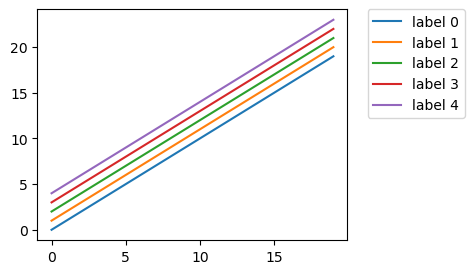

In [5]:
fig, ax = plt.subplots(figsize=(4,3))

for i in range(5):
    ax.plot(x, y+i, label=f'label {i}')

ax.legend(bbox_to_anchor=(0.9,0.53,0.5,0.5));

### Split legend

When using two `ax.legend()` commands only the last will be drawn (the last overwrite the prior one). Therefore you have to add the first legend object using the `ax.add_artist()` function as shown in the next example.

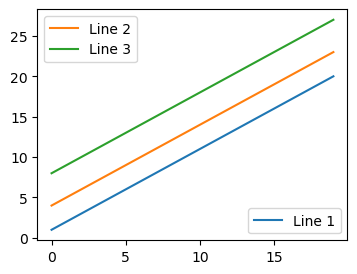

In [36]:
fig, ax = plt.subplots(figsize=(4,3))

line1, = ax.plot(x, y+1, label='Line 1')
line2, = ax.plot(x, y+4, label='Line 2')
line3, = ax.plot(x, y+8, label='Line 3')

#-- add first legend 
ax.add_artist(ax.legend(handles=[line1], loc='lower right'))

#-- draw second legend
ax.legend(handles=[line2,line3], loc='upper left');

### Label font size

Change the legend label font size with the `prop` keyword.

In [7]:
fig, ax = plt.subplots(figsize=(4,3))

for i in range(5):
    ax.plot(x, y+i, label=f'label {i}')

ax.legend(prop=dict(size=6));

### Space between line and label

Change the space between the lines/markers and their labels using the `handletextpad` keyword.

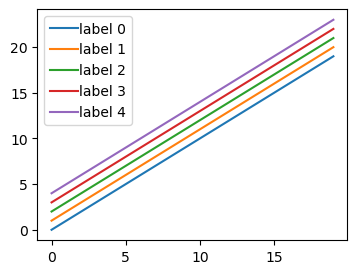

In [8]:
fig, ax = plt.subplots(figsize=(4,3))

for i in range(5):
    ax.plot(x, y+i, label=f'label {i}')

ax.legend(handletextpad=0.1);

### Lines and columns

You can use the `ncols` keyword to draw the legend entries in columns.

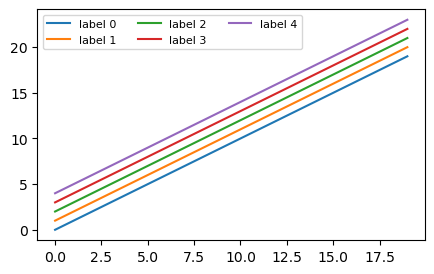

In [9]:
fig, ax = plt.subplots(figsize=(5,3))

for i in range(5):
    ax.plot(x, y+i, label=f'label {i}')

ax.legend(ncols=3, prop=dict(size=8));

### Legend box border and fill color

To make the legend box more fancy you can use the shadow keyword to draw a small `shadow` below the legend box. In the following example the border line color as well as the fill color of the legend box is changed by the `edgecolor` and `facecolor` keywords.

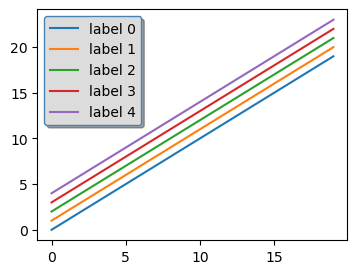

In [10]:
fig, ax = plt.subplots(figsize=(4,3))

for i in range(5):
    ax.plot(x, y+i, label=f'label {i}')

ax.legend(shadow=True, facecolor='gainsboro', edgecolor='steelblue');

### Change the legend labels

Usually a legend will be available when the `label` keyword is set in the plot command. If you decide to add a legend and won't want to change the plot commands you can use the `labels` keyword in the `ax.legend()` command.

In [11]:
fig, ax = plt.subplots(figsize=(4,3))

line1, = ax.plot(x, y+1)
line2, = ax.plot(x, y+4)
line3, = ax.plot(x, y+8)

labels = ['Line 1', 'Line 2', 'Line 3']

ax.legend(labels=labels);

For whatever reason, it is possible to display only a part of the generated plots (lines) in the legend.

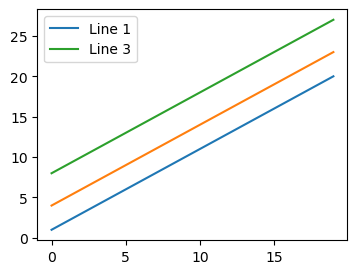

In [12]:
fig, ax = plt.subplots(figsize=(4,3))

line1, = ax.plot(x, y+1)
line2, = ax.plot(x, y+4)
line3, = ax.plot(x, y+8)

labels = ['Line 1', 'Line 3']

ax.legend(handles=[line1, line3], labels=labels);

### Legend line widths

You can change the line widths of each legend line using their handler objects. These objects and their labels can be retrieved with the `ax.get_legend_handles_labels()` function. Changing the linewidth will also change the plot line widths. To avoid this behavior you have to make a copy of the handlers, set the line widths, and then commit it using the handles keyword in the `ax.legend()` function call.

In [13]:
n = 40
x1 = np.arange(n+1) 
y1 = np.sin((x1/n)*np.pi) 

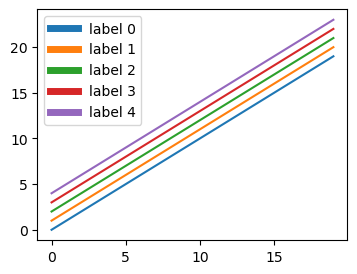

In [14]:
fig, ax = plt.subplots(figsize=(4,3))

for i in range(5):
    ax.plot(x, y+i, label=f'label {i}')

#-- get the legend entries
handles, labels = ax.get_legend_handles_labels()

#-- copy handles objects to change only the width of the 
#-- legend lines (not the plot lines too)
handles = [copy.copy(obj) for obj in handles]
[obj.set_linewidth(5) for obj in handles]

ax.legend(handles=handles, labels=labels);

The linewidth keyword in the `ax.fill_between()` call changes the outline of the legend hatch boxes too.

The following `mpl.rcParams['hatch.linewidth'] = 0.2` sets the line width of the hatch lines and symbols in the base resources of Matplotlib and will affect following hatch plots.
 

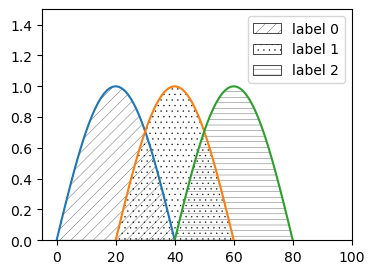

In [15]:
fig, ax = plt.subplots(figsize=(4,3))

ax.set_xlim(-5, 100)
ax.set_ylim(0., 1.5)

hatches = ['///', '...', '---']

j = 20
for i in range(3):
    ax.plot(x1+i*j, y1)
    ax.fill_between(x1+i*j, y1, 
                    facecolor='none', 
                    edgecolor='black', 
                    linewidth=0.5,      #-- change label hatch boxes line width
                    hatch=hatches[i], 
                    label=f'label {i}')

mpl.rcParams['hatch.linewidth'] = 0.2   #-- affects all following hatch plots

ax.legend();

### Change marker/hatch boxes border lines and sizes

The edgecolor keyword sets the border line of the line/marker/hatches box 

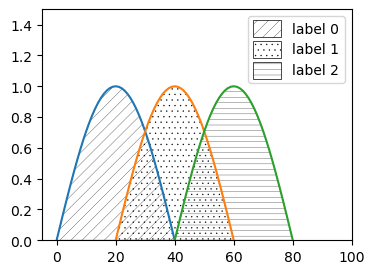

In [32]:
fig, ax = plt.subplots(figsize=(4,3))

ax.set_xlim(-5, 100)
ax.set_ylim(0., 1.5)

hatches = ['///', '...', '---']

j = 20
for i in range(3):
    ax.plot(x1+i*j, y1)
    ax.fill_between(x1+i*j, y1, 
                    facecolor='none', 
                    edgecolor='black', 
                    linewidth=0.5, 
                    hatch=hatches[i], 
                    label=f'label {i}')

mpl.rcParams['hatch.linewidth'] = 0.2

lg = ax.legend()
for patch in lg.get_patches():
    patch.set_height(12)     #-- size of the small legend boxes
    patch.set_y(-3)          #-- move legend entries downward

### Patches and Markers

Define some labels and colors.

In [17]:
labels = ['a','b','c','d','e','f']

N = 6
cmap = cmap = mpl.colormaps['Blues_r']
colors = cmap(np.linspace(0, 1, N))

Plot rectangles instead of lines in the legend.

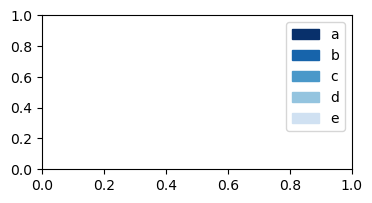

In [18]:
fig = plt.figure(figsize=(4,2))

ax = fig.add_subplot()

lgrect = []
for i in range(5):
    lgrect.append(mpatches.Patch(color=colors[i], label=labels[i]))

ax.legend(handles=lgrect)

Plot circles instead of lines in the legend.

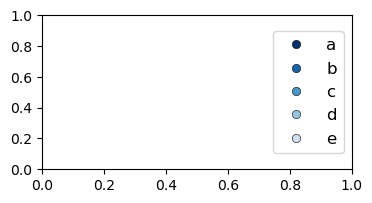

In [19]:
fig = plt.figure(figsize=(4,2))

ax = fig.add_subplot()

#-- here means the keyword 'color' the legend line color
lgmarker = []
for i in range(5):
    lgmarker.append(mlines.Line2D([], [], 
                                  color='none', 
                                  marker='o', 
                                  markersize=6,  
                                  markeredgecolor='black',
                                  markerfacecolor=colors[i],
                                  markeredgewidth=0.4))

ax.legend(lgmarker, labels, prop=dict(size=12), loc='center right');

Plot hatches instead of lines in the legend.

In [20]:
hatches = ['///', '...', '---', '+++', '-/-', '****']

In [21]:
fig = plt.figure(figsize=(4,2))

ax = fig.add_subplot()

lgmarker = []
for i in range(5):
    lgmarker.append(mpatches.Patch(facecolor='white',
                                   edgecolor='black',
                                   linewidth=0.4,
                                   hatch=hatches[i]))

ax.legend(lgmarker, labels, prop=dict(size=12), loc='center right');

### Control the number of markers in legend lines

As you can control the number of markers different to the number data points the `markevery` keyword in the plot command, you have to use the `handler_map` keyword for the legend. Additional you can use the `handlelength`keyword to change the length of the lines.

In [22]:
fig, ax = plt.subplots(figsize=(4,3))

line1, = ax.plot(x, y,   
                 color='blue', 
                 marker='o', 
                 markerfacecolor='None', 
                 markevery=4,
                 label='Line 1')
line2, = ax.plot(x, y+4, 
                 color='red', 
                 marker='o', 
                 markerfacecolor='None', 
                 markevery=2,
                 label='Line 2')

ax.legend(handler_map={line1: HandlerLine2D(numpoints=6),
                       line2: HandlerLine2D(numpoints=3)}, 
          handlelength=8);

## Cycles

In [57]:
from cycler import cycler

color_cycle = cycler(color=['red', 'green', 'blue'])
print(color_cycle)
print(len(color_cycle))
print(color_cycle.keys)
print('----------')
for v in color_cycle:
    print(v)

cycler('color', ['red', 'green', 'blue'])
3
{'color'}
----------
{'color': 'red'}
{'color': 'green'}
{'color': 'blue'}


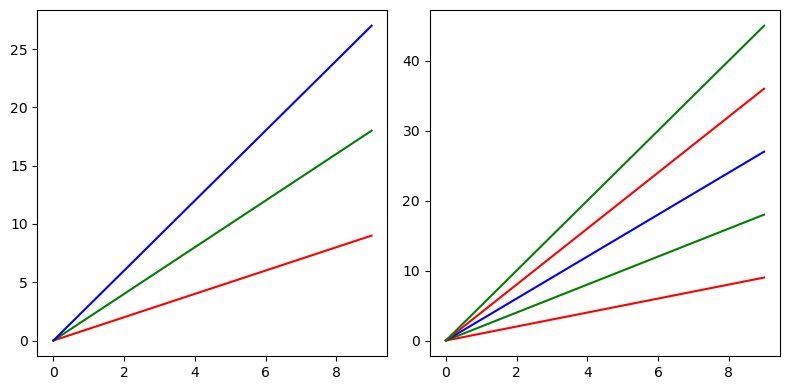

In [59]:
from itertools import cycle

fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True,
                               figsize=(8, 4))
x = np.arange(10)

color_cycle = cycler(c=['r', 'g', 'b'])

#-- left plot
for i, sty in enumerate(color_cycle):
   ax1.plot(x, x*(i+1), **sty)

#-- right plot
for i, sty in zip(range(1, 6), cycle(color_cycle)):
   ax2.plot(x, x*i, **sty)

### Cycles - compare

In [63]:
x = np.arange(0, 20, 1)
y = np.arange(0, 20, 1)
colors = ['red', 'green', 'blue', 'magenta', 'cyan',]

fig, ax = plt.subplots(figsize=(4,3))

for i in range(N):
    ax.plot(x, y+i, color=colors[i], label=f'label {i}')

ax.legend();

Same as

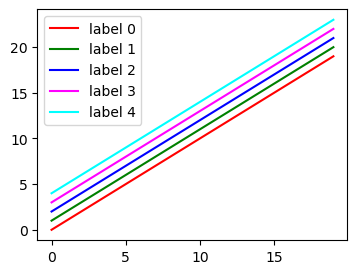

In [68]:
x = np.arange(0, 20, 1)
y = np.arange(0, 20, 1)

color_cycle = cycler(color=['red', 'green', 'blue', 'magenta', 'cyan'])

fig, ax = plt.subplots(figsize=(4,3))

for i, sty in enumerate(color_cycle):
   ax.plot(x, y+i, label=f'label {i}', **sty)

ax.legend();